## Problem Statement 

### The vast amount of data available on the financial and operational performance of companies can make it difficult for investors to make well-informed investment decisions. This study seeks to examine how different company characteristics, such as Industry, Sector, Founding Year, Annual Revenue, Market Cap, Employee Size, and Annual Income Tax, are interrelated and to identify the factors that have the greatest impact on Financial Performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
import datetime as dt 
from datetime import datetime

In [2]:
df = pd.read_csv("D:/Datasets/Top 50 US Tech Companies 2022 - 2023.csv")
df.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473


In [3]:
df.isnull().sum()

Company Name                                        0
Industry                                            0
Sector                                              0
HQ State                                            0
Founding Year                                       0
Annual Revenue 2022-2023 (USD in Billions)          0
Market Cap (USD in Trillions)                       0
Stock Name                                          0
Annual Income Tax in 2022-2023 (USD in Billions)    0
Employee Size                                       0
dtype: int64

In [3]:
df.dtypes

Company Name                                         object
Industry                                             object
Sector                                               object
HQ State                                             object
Founding Year                                         int64
Annual Revenue 2022-2023 (USD in Billions)          float64
Market Cap (USD in Trillions)                       float64
Stock Name                                           object
Annual Income Tax in 2022-2023 (USD in Billions)    float64
Employee Size                                         int64
dtype: object

In [41]:
df['Annual Income Tax in 2022-2023 (USD in Billions)'] = df['Annual Income Tax in 2022-2023 (USD in Billions)'].apply(lambda x : abs(x))

## Does a company's Founding Year have a significant impact on its financial performance?

### 1) Can the founding year of a company be considered a significant factor affecting its revenue?

In [42]:
currentYear = datetime.now().year
currentYear

2023

In [43]:
df['age'] = currentYear-df['Founding Year']

##### Exploring the Relationship Between Age and Revenue

<AxesSubplot:>

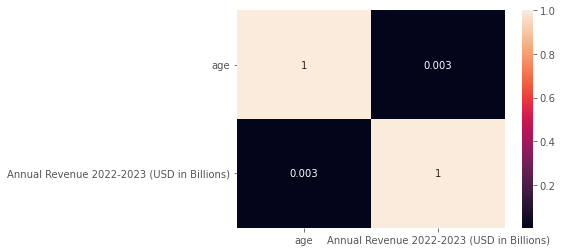

In [44]:
sns.heatmap(df[['age', 'Annual Revenue 2022-2023 (USD in Billions)']].corr(), annot=True)

Based on the correlation matrix, it appears that there is no clear or direct relationship between a company's age (as indicated by its founding year) and its revenue.

##### Exploring the Relationship Between Age Categories (Young, Mid-Age, and Mature) and Revenue 

In [45]:
# Young (0-10 years old): Companies founded between 2013-2023
# Mid-aged (11-30 years old): Companies founded between 1993-2012
# Mature (31+ years old): Companies founded before 1993

bins = [0, 10, 30, float("inf")]
labels = ['Young', 'Mid-aged', 'Mature']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

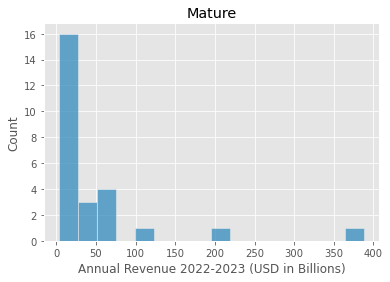

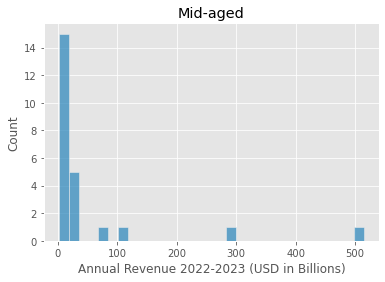

In [46]:
for i in df['age_group'].unique():
    plt.figure()
    sns.histplot(df[df['age_group']==i]['Annual Revenue 2022-2023 (USD in Billions)'])
    plt.title(i)

The revenue distribution between mature and mid-aged companies is fairly similar.

##### Comparing the average revenue of mature and mid-aged

In [47]:
df_age_group = df.groupby('age_group')[['Market Cap (USD in Trillions)', 'Annual Revenue 2022-2023 (USD in Billions)']].mean().reset_index()
df_age_group

,age_group,Market Cap (USD in Trillions),Annual Revenue 2022-2023 (USD in Billions)
0,Young,NaN,NaN
1,Mid-aged,0.230458,52.927083
2,Mature,0.272192,49.614231


<AxesSubplot:xlabel='age_group', ylabel='Annual Revenue 2022-2023 (USD in Billions)'>

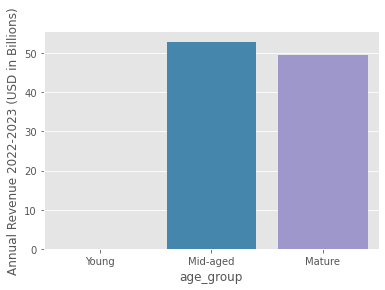

In [48]:
sns.barplot(data=df_age_group, x='age_group', y='Annual Revenue 2022-2023 (USD in Billions)')

The average revenue of mid-aged companies is slightly greater than that of mature companies.

##### Exploring the Relationship Between Age Categories (Young, Mid-Age, and Mature) and Revenue Across Different Sectors.

In [49]:
df_AgeGroup = df.groupby(['Sector','age_group'])[['Market Cap (USD in Trillions)', 'Annual Revenue 2022-2023 (USD in Billions)']].mean().reset_index()
df_AgeGroup

,Sector,age_group,Market Cap (USD in Trillions),Annual Revenue 2022-2023 (USD in Billions)
0,Communication Equipments,Young,NaN,NaN
1,Communication Equipments,Mid-aged,NaN,NaN
2,Communication Equipments,Mature,0.20800,53.16000
3,Computer Hardware,Young,NaN,NaN
4,Computer Hardware,Mid-aged,0.05200,4.38000
5,Computer Hardware,Mature,0.02800,81.04000
6,Consumer Electronics,Young,NaN,NaN
7,Consumer Electronics,Mid-aged,NaN,NaN
8,Consumer Electronics,Mature,2.52000,387.53000
9,Electronic Components,Young,NaN,NaN


##### Comparing the average revenue of mature and mid-aged across different sectors

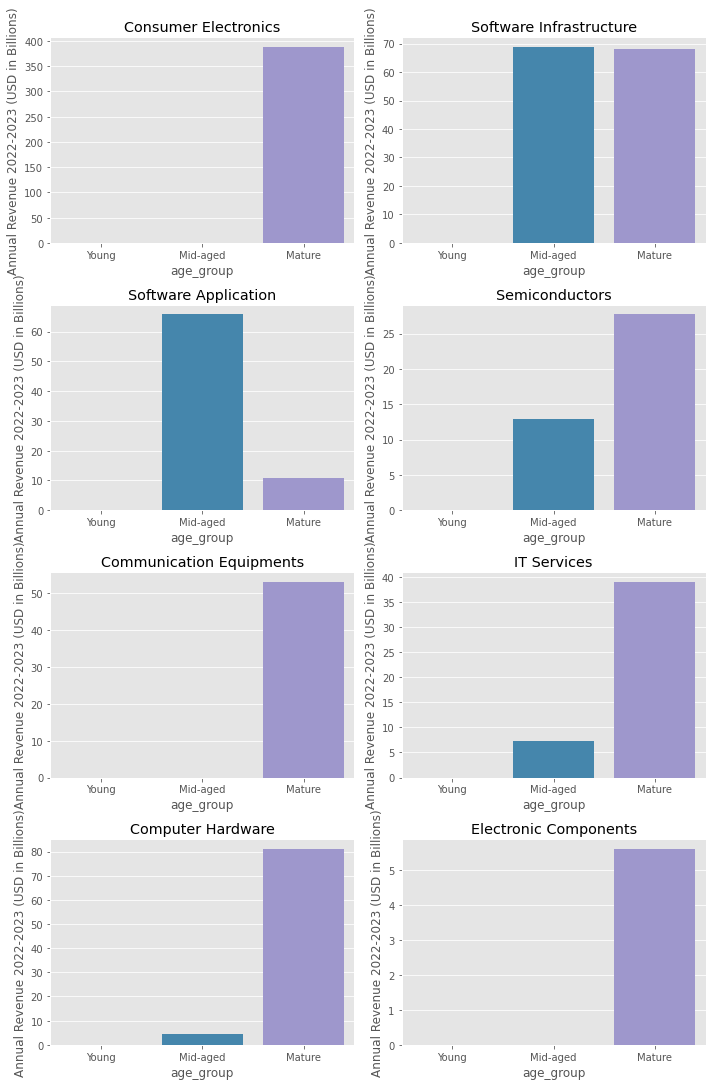

In [50]:
sectors = df['Sector'].unique()
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))


for idx, sector in enumerate(sectors):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.barplot(data=df_AgeGroup[df_AgeGroup['Sector']==sector], x='age_group', y='Annual Revenue 2022-2023 (USD in Billions)', ax=ax)
    ax.set_title(sector)


fig.tight_layout()
plt.show()


Upon comparing the mean revenue of mature and mid-aged companies across different sectors, it was found that for certain sectors, mid-aged companies had a higher average annual revenue, whereas for others, mature companies had a higher average revenue.

##### Verifying the Accuracy of the Insight by Analyzing Revenue Distribution among Sectors for Mature and Mid-Aged Companies.

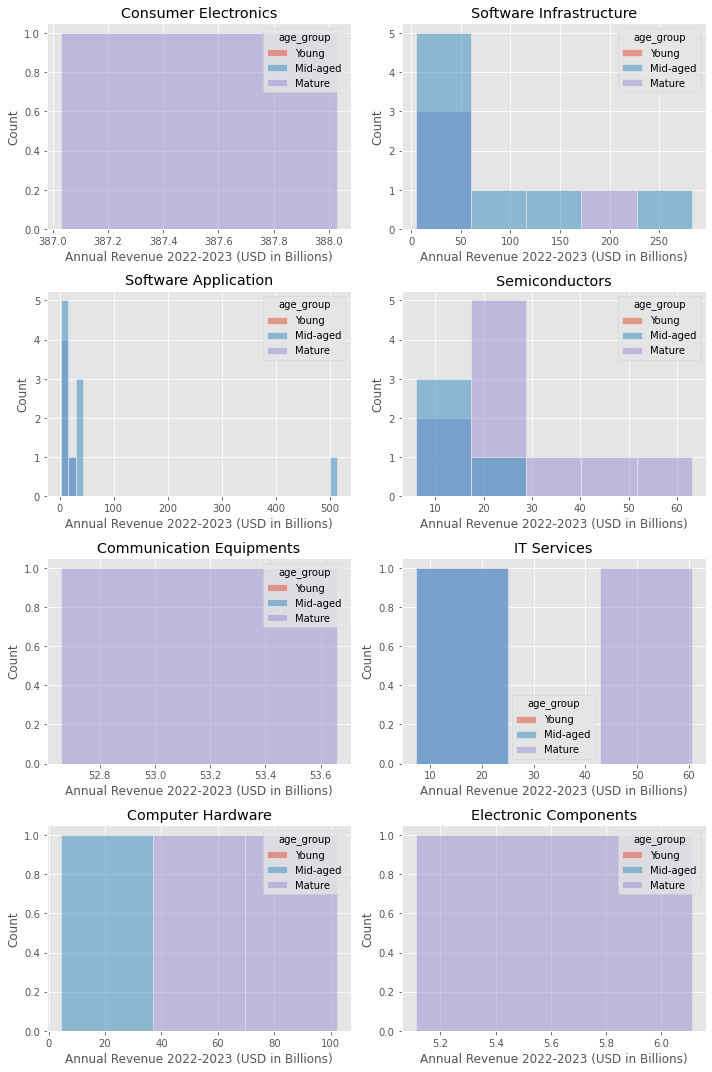

In [51]:
sectors = df['Sector'].unique()
num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))

for idx, sector in enumerate(sectors):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.histplot(data=df[df['Sector']==sector], x='Annual Revenue 2022-2023 (USD in Billions)', hue='age_group', ax=ax)
    ax.set_title(sector)

fig.tight_layout()
plt.show()

The analysis of revenue distribution across different sectors confirms the previous finding that the age of a company does not have a uniform impact on all sectors.

#### 2) Can the founding year of a company be considered a significant factor affecting its Market Cap?

<AxesSubplot:>

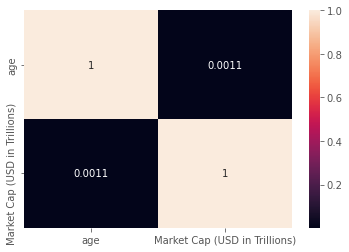

In [52]:
sns.heatmap(df[['age', 'Market Cap (USD in Trillions)']].corr(), annot=True)

The correlation matrix indicates that there is no significant correlation between a company's market capitalization and its age.

##### Exploring the Relationship Between Age Categories (Young, Mid-Age, and Mature) and Market Cap.

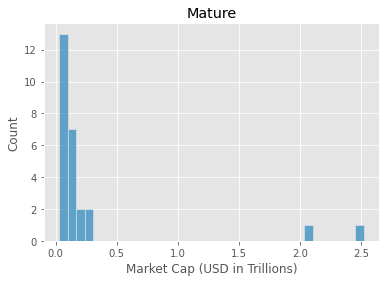

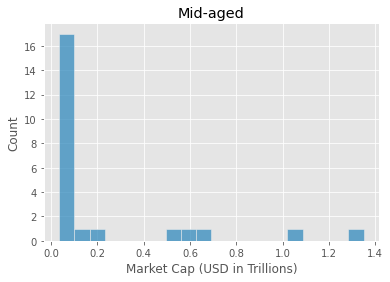

In [53]:
for i in df['age_group'].unique():
    plt.figure()
    sns.histplot(df[df['age_group']==i]['Market Cap (USD in Trillions)'])
    plt.title(i)

The maximum market capitalization observed in the mature company category is around 2.5 trillion, whereas for mid-aged companies, it is around 1.3 trillion.

<AxesSubplot:xlabel='age_group', ylabel='Market Cap (USD in Trillions)'>

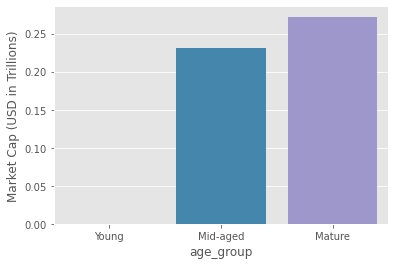

In [54]:
sns.barplot(data=df_age_group, x='age_group', y='Market Cap (USD in Trillions)')

The average of market capitalization is higher for mature category.

##### Comparing the average market cap of mature and mid-aged across different sectors

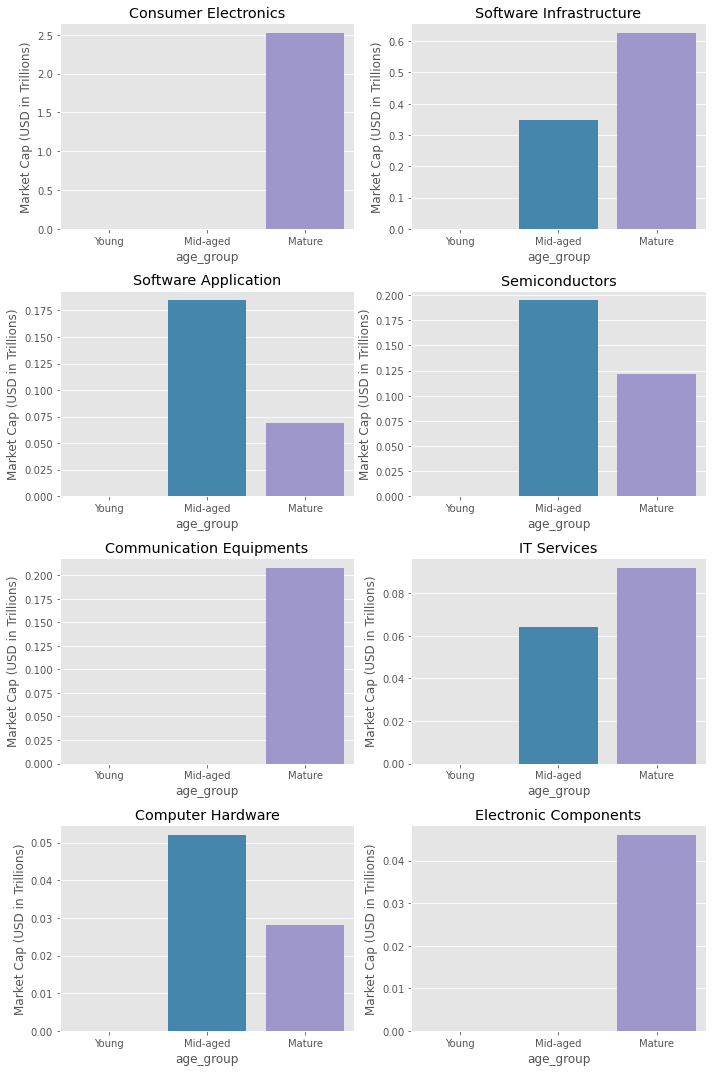

In [55]:
sectors = df['Sector'].unique()
num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))

for idx, sector in enumerate(sectors):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.barplot(data=df_AgeGroup[df_AgeGroup['Sector']==sector], x='age_group', y='Market Cap (USD in Trillions)', ax=ax)
    ax.set_title(sector)

fig.tight_layout()
plt.show()

The market cap varies significantly across sectors, and the age group of the companies does not necessarily have a clear pattern in relation to market cap.

##### Verifying the Accuracy of the Insight by Analyzing Market Cap Distribution among Sectors for Mature and Mid-Aged Companies.

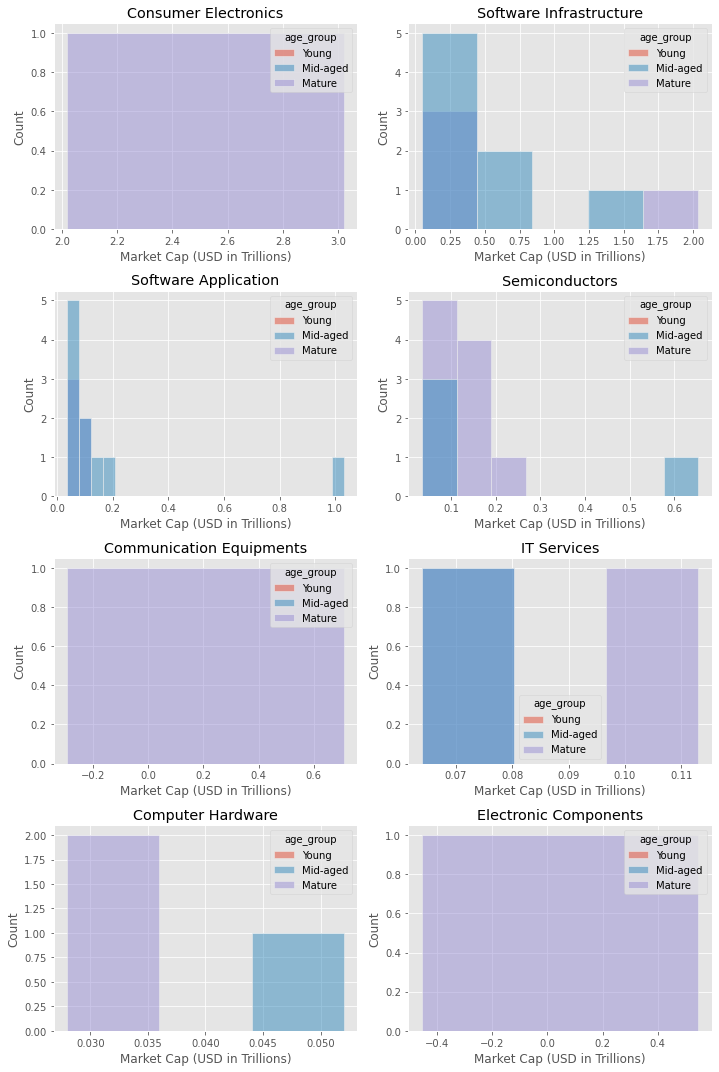

In [56]:
sectors = df['Sector'].unique()
num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))

for idx, sector in enumerate(sectors):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.histplot(data=df[df['Sector']==sector], x='Market Cap (USD in Trillions)', hue='age_group', ax=ax)
    ax.set_title(sector)

fig.tight_layout()
plt.show()

The market cap distribution across sectors indicates that there is no distinct pattern between the age groups of companies and their corresponding market cap.

### Metrics 

In [57]:
df['P/S ratio'] = (df['Market Cap (USD in Trillions)']*1000000000000)/(df['Annual Revenue 2022-2023 (USD in Billions)'] * 1000000000)

In [58]:
df['P/S ratio'].median()

5.7989998207954505

In [59]:
df['stock valuation'] = df['P/S ratio'].apply(lambda x : 'High Valued' if x> df['P/S ratio'].median() else 'Low Valued' )

In [60]:
df['Tax-to-Revenue Ratio'] = (df['Annual Income Tax in 2022-2023 (USD in Billions)']/df['Annual Revenue 2022-2023 (USD in Billions)'])*100

In [61]:
# this metrics help to understand the employee productivity of the company

df['Revenue per Employee (in lakhs)']=(df['Annual Revenue 2022-2023 (USD in Billions)']/df['Employee Size'])*10000

##### Stock Valuation by Age Group Count

Text(0.5, 1.0, 'Stock Valuation by Age Group Count Plot')

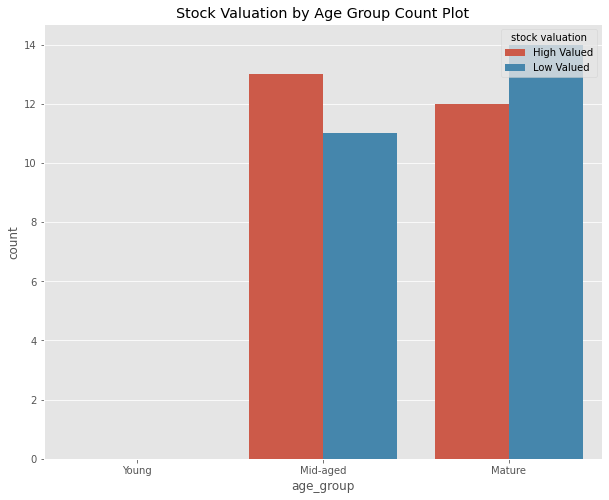

In [62]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df ,hue='stock valuation', x='age_group' )
plt.title('Stock Valuation by Age Group Count Plot')

The analysis shows that the mature companies have a slightly lower proportion of high-valued stock and a slightly higher proportion of low-valued stock, as compared to the mid-aged companies. This suggests that while age may have some influence on stock valuation, it is not the only factor that affects the value of a company's stock. 

In [63]:
df.columns

Index(['Company Name', 'Industry', 'Sector', 'HQ State', 'Founding Year',
       'Annual Revenue 2022-2023 (USD in Billions)',
       'Market Cap (USD in Trillions)', 'Stock Name',
       'Annual Income Tax in 2022-2023 (USD in Billions)', 'Employee Size',
       'age', 'age_group', 'P/S ratio', 'stock valuation',
       'Tax-to-Revenue Ratio', 'Revenue per Employee (in lakhs)'],
      dtype='object')

## Can the industry sector significantly influence the financial performance? 

##### Comparing the average of metrics across different sectors

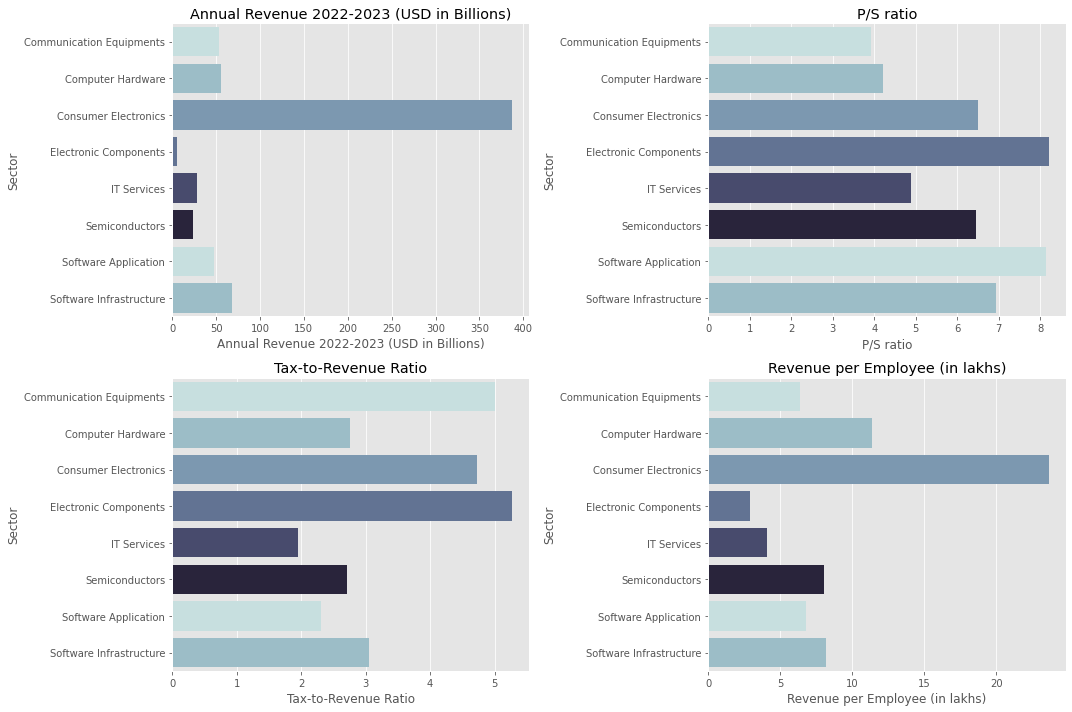

In [64]:
metrics = ['Annual Revenue 2022-2023 (USD in Billions)','P/S ratio',
       'Tax-to-Revenue Ratio', 'Revenue per Employee (in lakhs)']
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))

# Set color palette
my_palette = ListedColormap(sns.color_palette("ch:start=.2,rot=-.3"))

for idx, metrics in enumerate(metrics):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    
    sns.barplot(data=df.groupby('Sector')[metrics].mean().to_frame().reset_index(), y='Sector', x=metrics, ax=ax, palette=my_palette.colors)
    ax.set_title(metrics)

fig.tight_layout()
plt.show()

The Communication Equipment, Computer Hardware, and IT Services sectors have lower P/S ratios compared to the overall average P/S ratio of the analyzed sectors. This suggests that these sectors may be undervalued relative to their revenue generation.

The IT Services has a low tax-to-revenue ratio, indicating that it is paying less in taxes than it is generating in revenue.

The Consumer Electronics sector has a high level of revenue generated per employee compared to the other sectors analyzed, indicating that this sector is highly productive and efficient in generating revenue with a relatively smaller workforce. 

##### Analyzing P/S ratio Distribution among Sectors

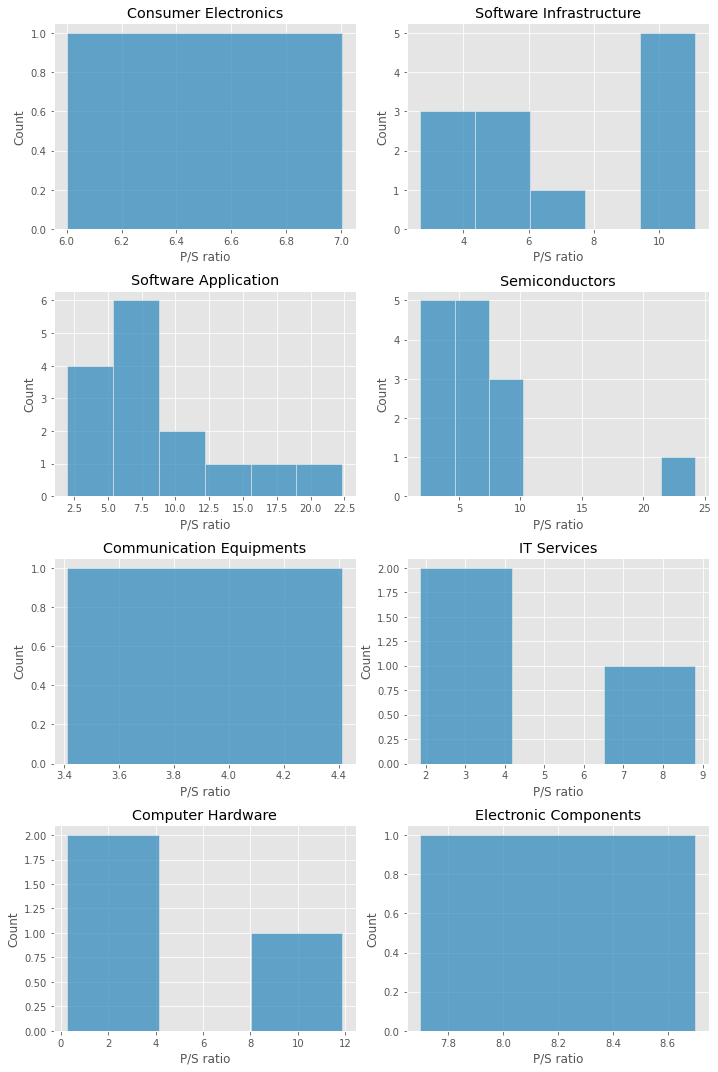

In [65]:
sectors = df['Sector'].unique()
num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))

for idx, sector in enumerate(sectors):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.histplot(data=df[df['Sector']==sector], x='P/S ratio', ax=ax)
    ax.set_title(sector)

fig.tight_layout()
plt.show()

The Software Application sector has a majority of high-value stocks.

##### Analyzing Tax-to-Revenue Ratio Distribution among Sectors

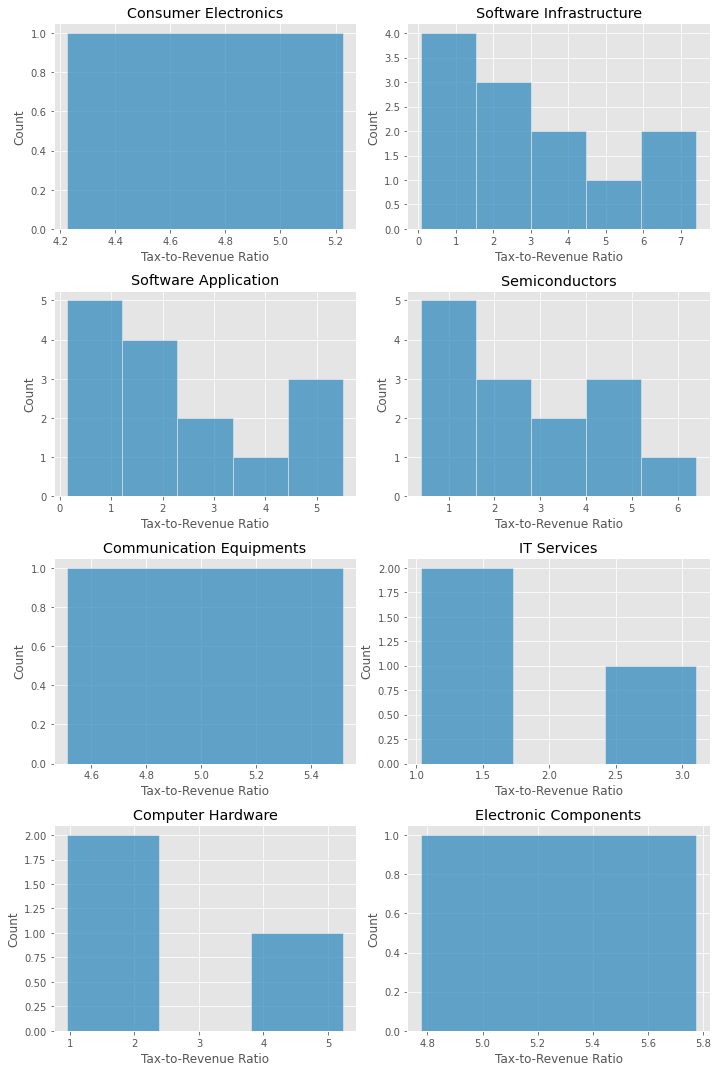

In [66]:
sectors = df['Sector'].unique()
num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))

for idx, sector in enumerate(sectors):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.histplot(data=df[df['Sector']==sector], x='Tax-to-Revenue Ratio', ax=ax)
    ax.set_title(sector)

fig.tight_layout()
plt.show()

Upon examining the tax-to-revenue ratio distribution across sectors, it is evident that every sector has both low and high tax-to-revenue ratios.

##### Analyzing Revenue per Employee Distribution among Sectors

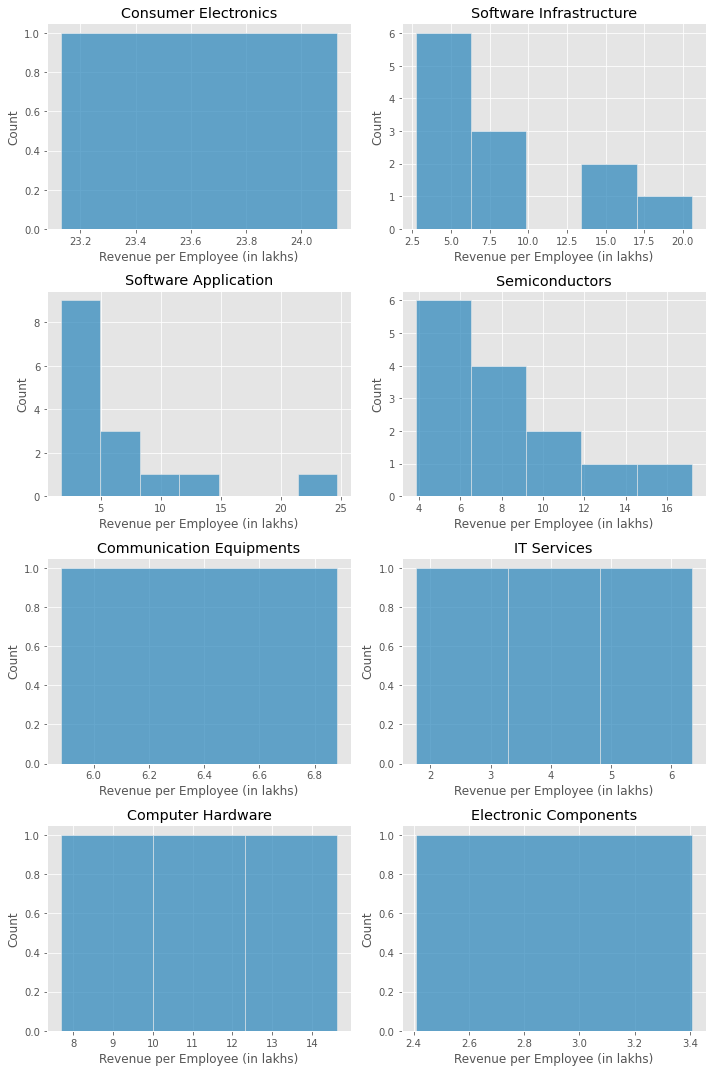

In [67]:
sectors = df['Sector'].unique()
num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))

for idx, sector in enumerate(sectors):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.histplot(data=df[df['Sector']==sector], x='Revenue per Employee (in lakhs)', ax=ax)
    ax.set_title(sector)

fig.tight_layout()
plt.show()

While revenue per employee may not provide extensive insights, it does suggest that the software application and semiconductor sectors have a majority of companies with lower revenue per employee. This suggests a lower level of employee productivity within these sectors.

## Is the financial performance of a business significantly impacted by its location?

##### Comparing the average of metrics across different locations.

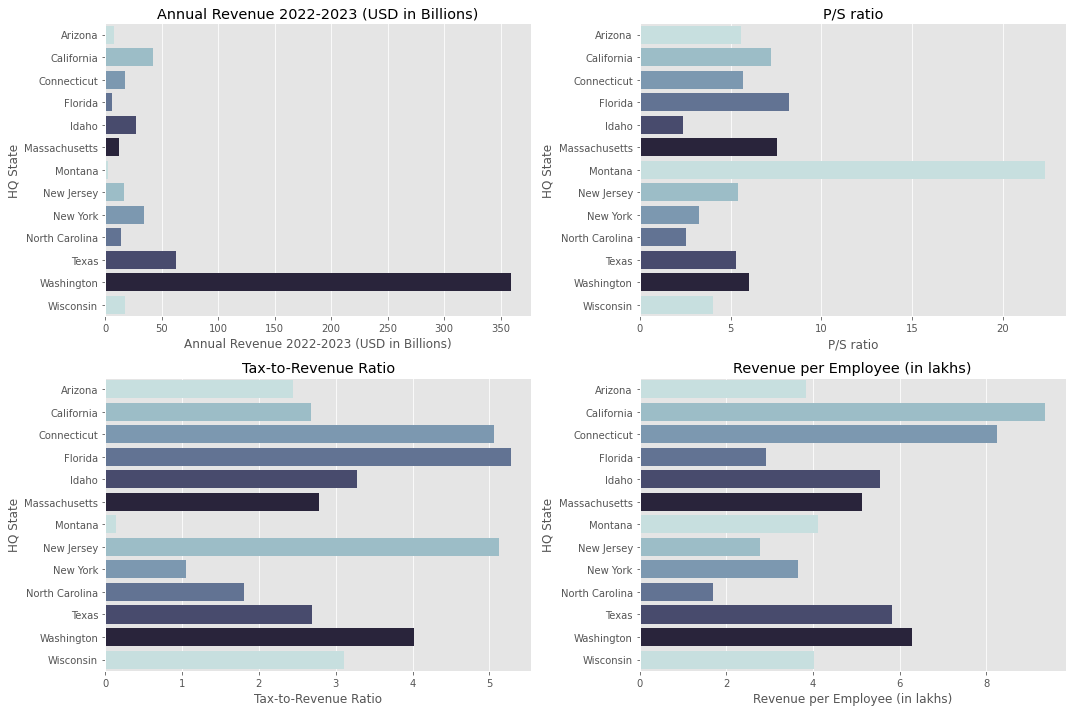

In [68]:
metrics = ['Annual Revenue 2022-2023 (USD in Billions)','P/S ratio',
       'Tax-to-Revenue Ratio', 'Revenue per Employee (in lakhs)']
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))

# Set color palette
my_palette = ListedColormap(sns.color_palette("ch:start=.2,rot=-.3"))

for idx, metrics in enumerate(metrics):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    
    sns.barplot(data=df.groupby('HQ State')[metrics].mean().to_frame().reset_index(), y='HQ State', x=metrics, ax=ax, palette=my_palette.colors)
    ax.set_title(metrics)

fig.tight_layout()
plt.show()

Washington has the highest annual revenue at 359 billion , followed by Texas at 62 billion. Florida has the lowest annual revenue at  5.61 billion.

Montana exhibits a high price-to-sales ratio, a low tax-to-revenue ratio, and an average revenue per employee.

New York has the lowest tax-to-revenue ratio at 0.01%.

California has the highest revenue per employee at 9.37 lakhs, followed by Washington at 6.29 lakhs. 

##### Analyzing P/S ratio Distribution among locations

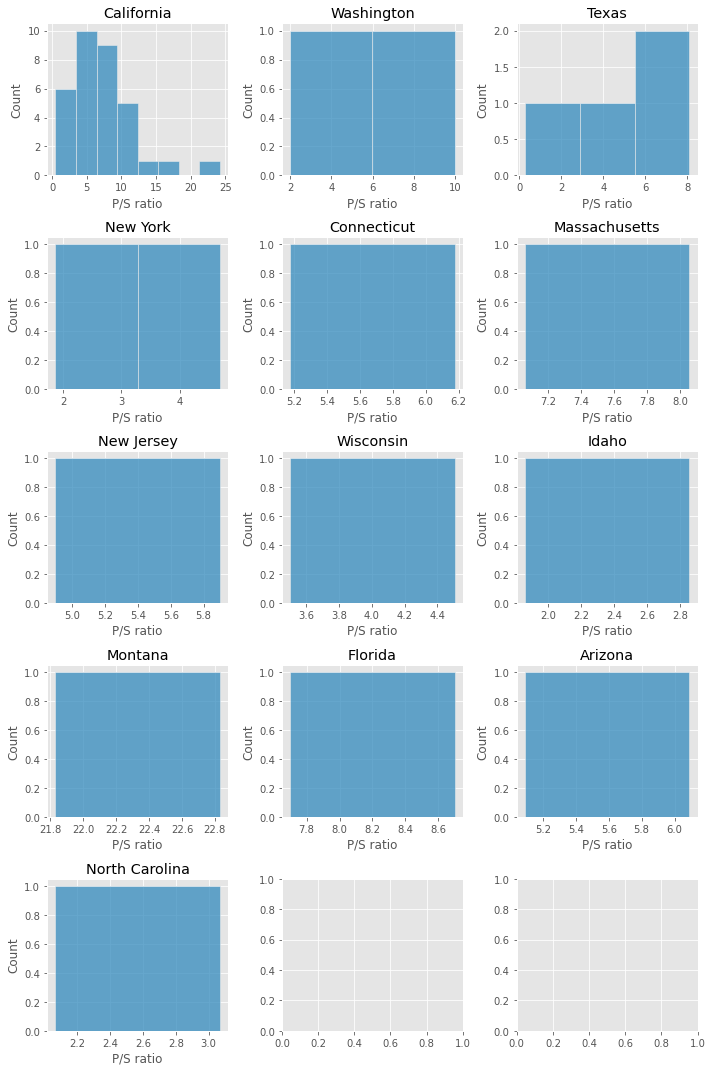

In [69]:
locations = df['HQ State'].unique()
num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))

for idx, location in enumerate(locations):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.histplot(data=df[df['HQ State']==location], x='P/S ratio', ax=ax)
    ax.set_title(location)

fig.tight_layout()
plt.show()

The fact that many locations have only one or two companies does not provide enough information to draw a conclusion.

## Company-wise Analysis

### Price-to-Sales (P/S) ratio across companies

<AxesSubplot:ylabel='Company Name'>

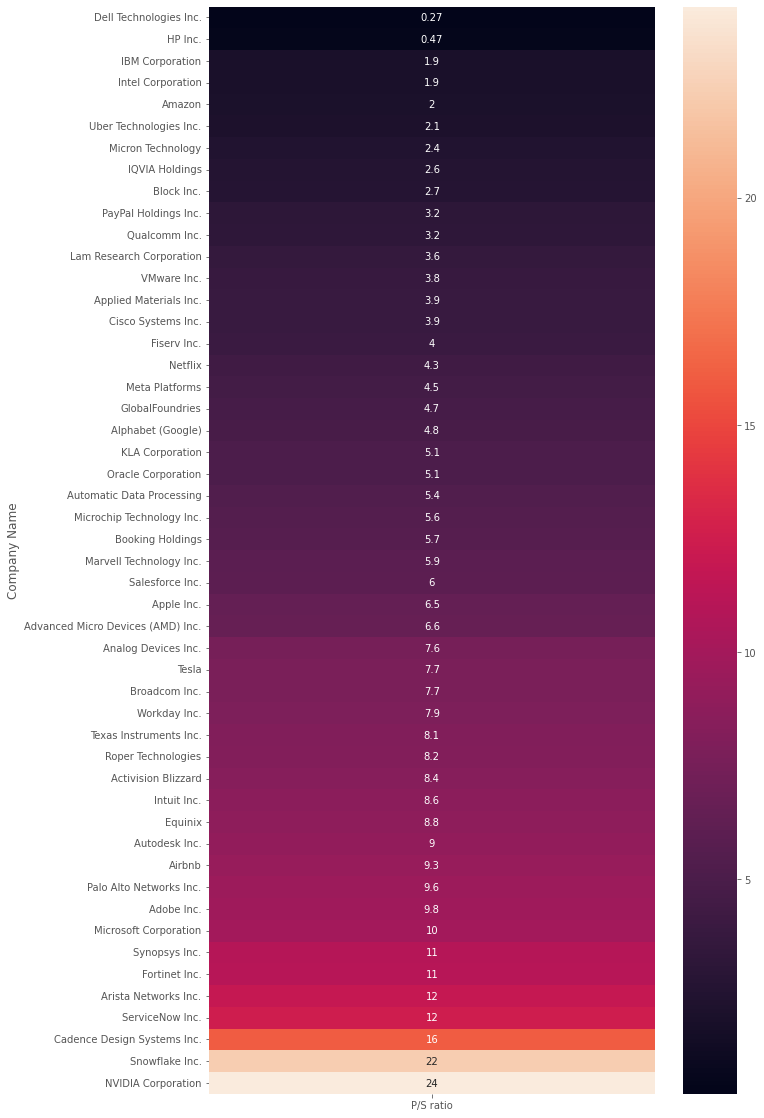

In [70]:
plt.figure(figsize=(10,20))
sns.heatmap(data=df[['Company Name','P/S ratio']].sort_values('P/S ratio').set_index('Company Name'), annot=True)

NVIDIA Corporation and snowflake Inc have the highest P/S ratio of 24.21 and 22, indicating that their stock price are the most expensive relative to their sales.

Dell Technologies Inc. and HP Inc. have the lowest P/S ratios of 0.27 and 0.47 respectively, indicating that their stocks are relatively cheap compared to their sales.

Most companies have P/S ratios in the range of 3 to 10, which can be considered average.

##### Companies with a relatively low Price-to-Sales (P/S) Ratio

<AxesSubplot:xlabel='P/S ratio', ylabel='Company Name'>

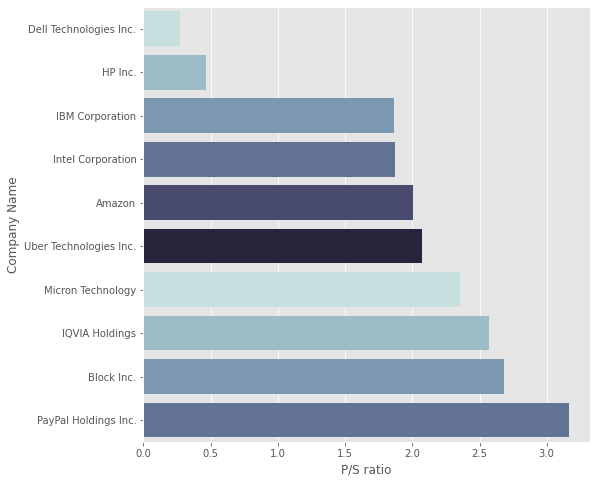

In [71]:
my_palette = sns.color_palette("ch:start=.2,rot=-.3")

plt.figure(figsize=(8,8))
sns.barplot(data=df.sort_values('P/S ratio').head(10), y='Company Name', x='P/S ratio', palette=my_palette)

### Tax-to-Revenue Ratio across companies

<AxesSubplot:ylabel='Company Name'>

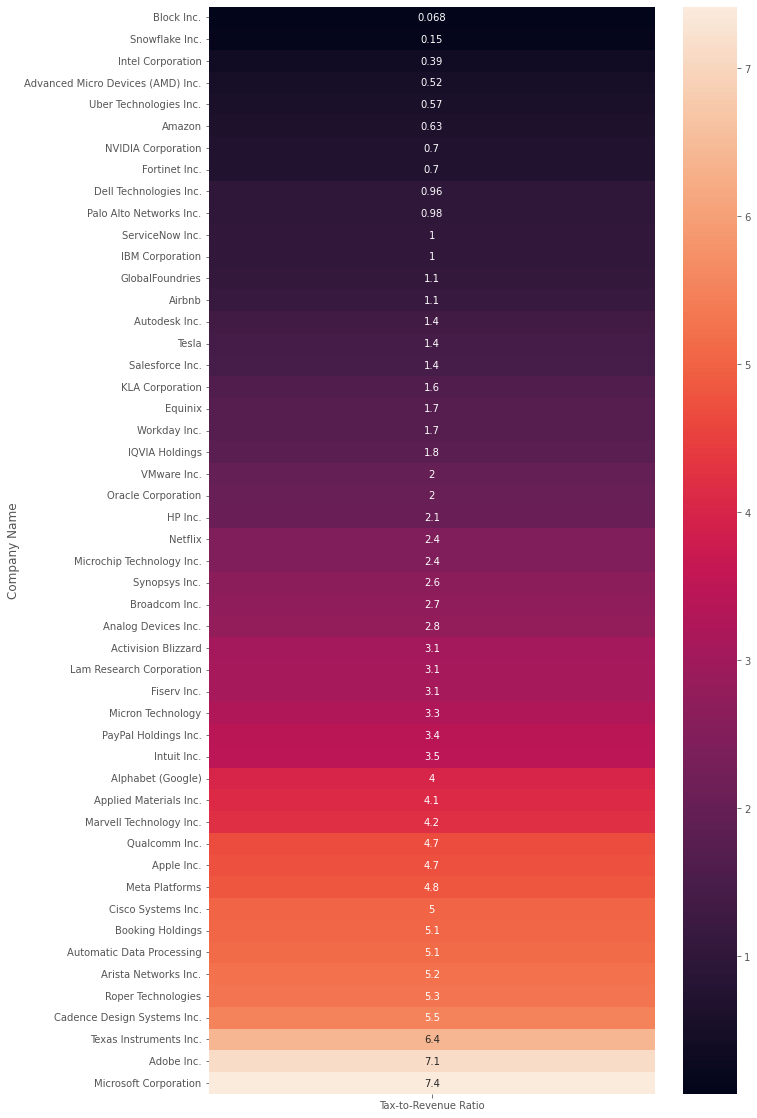

In [72]:
plt.figure(figsize=(10,20))
sns.heatmap(data=df[['Company Name','Tax-to-Revenue Ratio']].sort_values('Tax-to-Revenue Ratio').set_index('Company Name'), annot=True)

Companies such as IBM Corporation, Amazon, Uber Technologies Inc., Advanced Micro Devices (AMD) Inc., Intel Corporation, Block Inc. have a tax-to-revenue ratio of -1.03, which means that the companies paid less in taxes than the revenue it generated.

##### Companies with a relatively low Tax-to-Revenue Ratio

<AxesSubplot:xlabel='Tax-to-Revenue Ratio', ylabel='Company Name'>

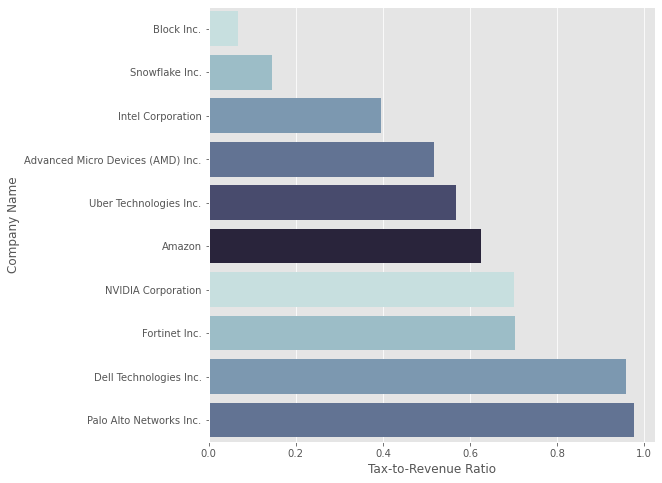

In [73]:
my_palette = sns.color_palette("ch:start=.2,rot=-.3")

plt.figure(figsize=(8,8))
sns.barplot(data=df[['Company Name','Tax-to-Revenue Ratio']].sort_values('Tax-to-Revenue Ratio').head(10), y='Company Name', x='Tax-to-Revenue Ratio', palette=my_palette)

### Revenue per Employee across companies

<AxesSubplot:ylabel='Company Name'>

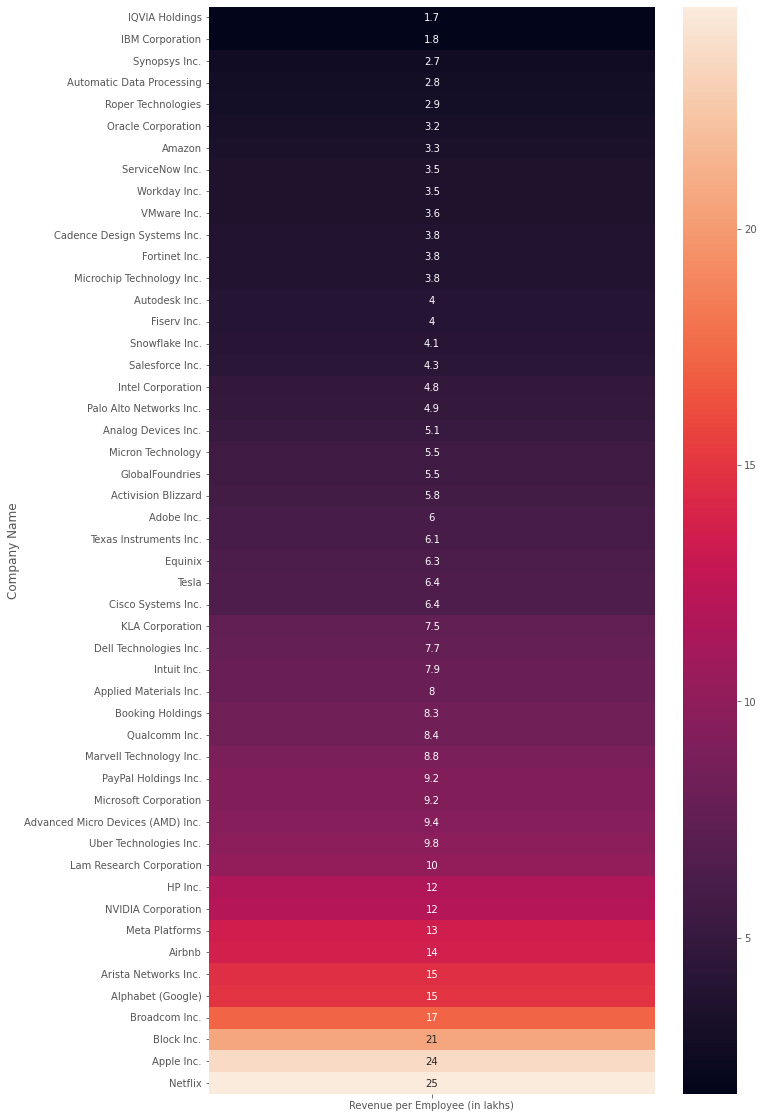

In [74]:
plt.figure(figsize=(10,20))
sns.heatmap(data=df[['Company Name','Revenue per Employee (in lakhs)']].sort_values('Revenue per Employee (in lakhs)').set_index('Company Name'), annot=True)

The analysis shows that companies such as Netflix, Apple Inc., and Block Inc. have a high revenue per employee.

##### Companies with high Revenue per Employee

<AxesSubplot:xlabel='Revenue per Employee (in lakhs)', ylabel='Company Name'>

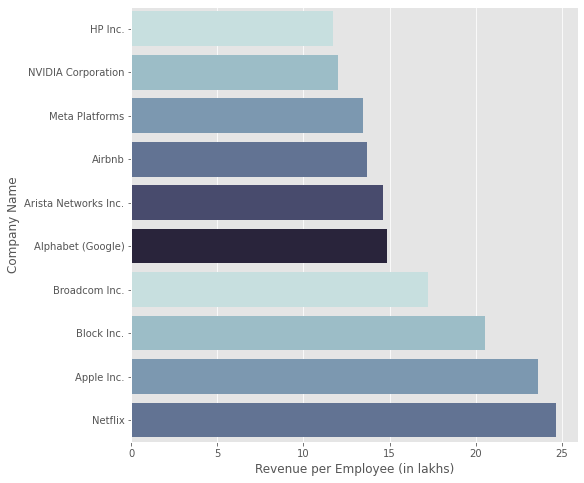

In [75]:
my_palette = sns.color_palette("ch:start=.2,rot=-.3")

plt.figure(figsize=(8,8))
sns.barplot(data=df.sort_values('Revenue per Employee (in lakhs)').tail(10), y='Company Name', x='Revenue per Employee (in lakhs)', palette=my_palette)

### Recommendations

1. Since there is no clear or direct relationship between a company's age and revenue, investors should not base their investment decisions solely on a company's age.

2. Those seeking to invest in undervalued sectors may want to consider companies like Dell Technologies Inc. and HP Inc.

3. For those looking to invest in highly productive companies, options like Netflix, Apple, and Block may be worth considering due to their ability to generate high revenue per employee.

4. Prior to making investment decisions, investors may find it useful to consider a company's tax-to-revenue ratio. In this regard, companies like Block Inc and Snowflake Inc may be a good choice.